Id: Unique identifier for each individual in the dataset.
Year_Birth: The birth year of the individual.
Education: The highest level of education attained by the individual.
Marital_Status: The marital status of the individual.
Income: The annual income of the individual.
Kidhome: The number of young children in the household.
Teenhome: The number of teenagers in the household.
Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.
Recency: The number of days since the last purchase or interaction.
MntWines: The amount spent on wines.
MntFruits: The amount spent on fruits.
MntMeatProducts: The amount spent on meat products.
MntFishProducts: The amount spent on fish products.
MntSweetProducts: The amount spent on sweet products.
MntGoldProds: The amount spent on gold products.
NumDealsPurchases: The number of purchases made with a discount or as part of a deal.
NumWebPurchases: The number of purchases made through the company's website.
NumCatalogPurchases: The number of purchases made through catalogs.
NumStorePurchases: The number of purchases made in physical stores.
NumWebVisitsMonth: The number of visits to the company's website in a month.
AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.
AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.
AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.
AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.
AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.
Complain: Binary indicator (1 or 0) whether the individual has made a complaint.
Z_CostContact: A constant cost associated with contacting a customer.
Z_Revenue: A constant revenue associated with a successful campaign response.
Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df=pd.read_csv('customer_segmentation.csv')

In [4]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [13]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [19]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)

In [21]:
df['Age'] = 2025 - df['Year_Birth']

In [22]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [23]:
df['totat_amount'] = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis=1)

In [24]:
df.drop(columns=['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds'],inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   NumDealsPurchases    2216 non-null   int64         
 10  NumWebPurchases      2216 non-null   int64         
 11  NumCatalogPurchases  2216 non-null   int64         
 12  NumStorePurchases    2216 non-null   int64         
 13  NumWebVisitsMonth    2216 non-null   i

<Axes: xlabel='totat_amount', ylabel='Count'>

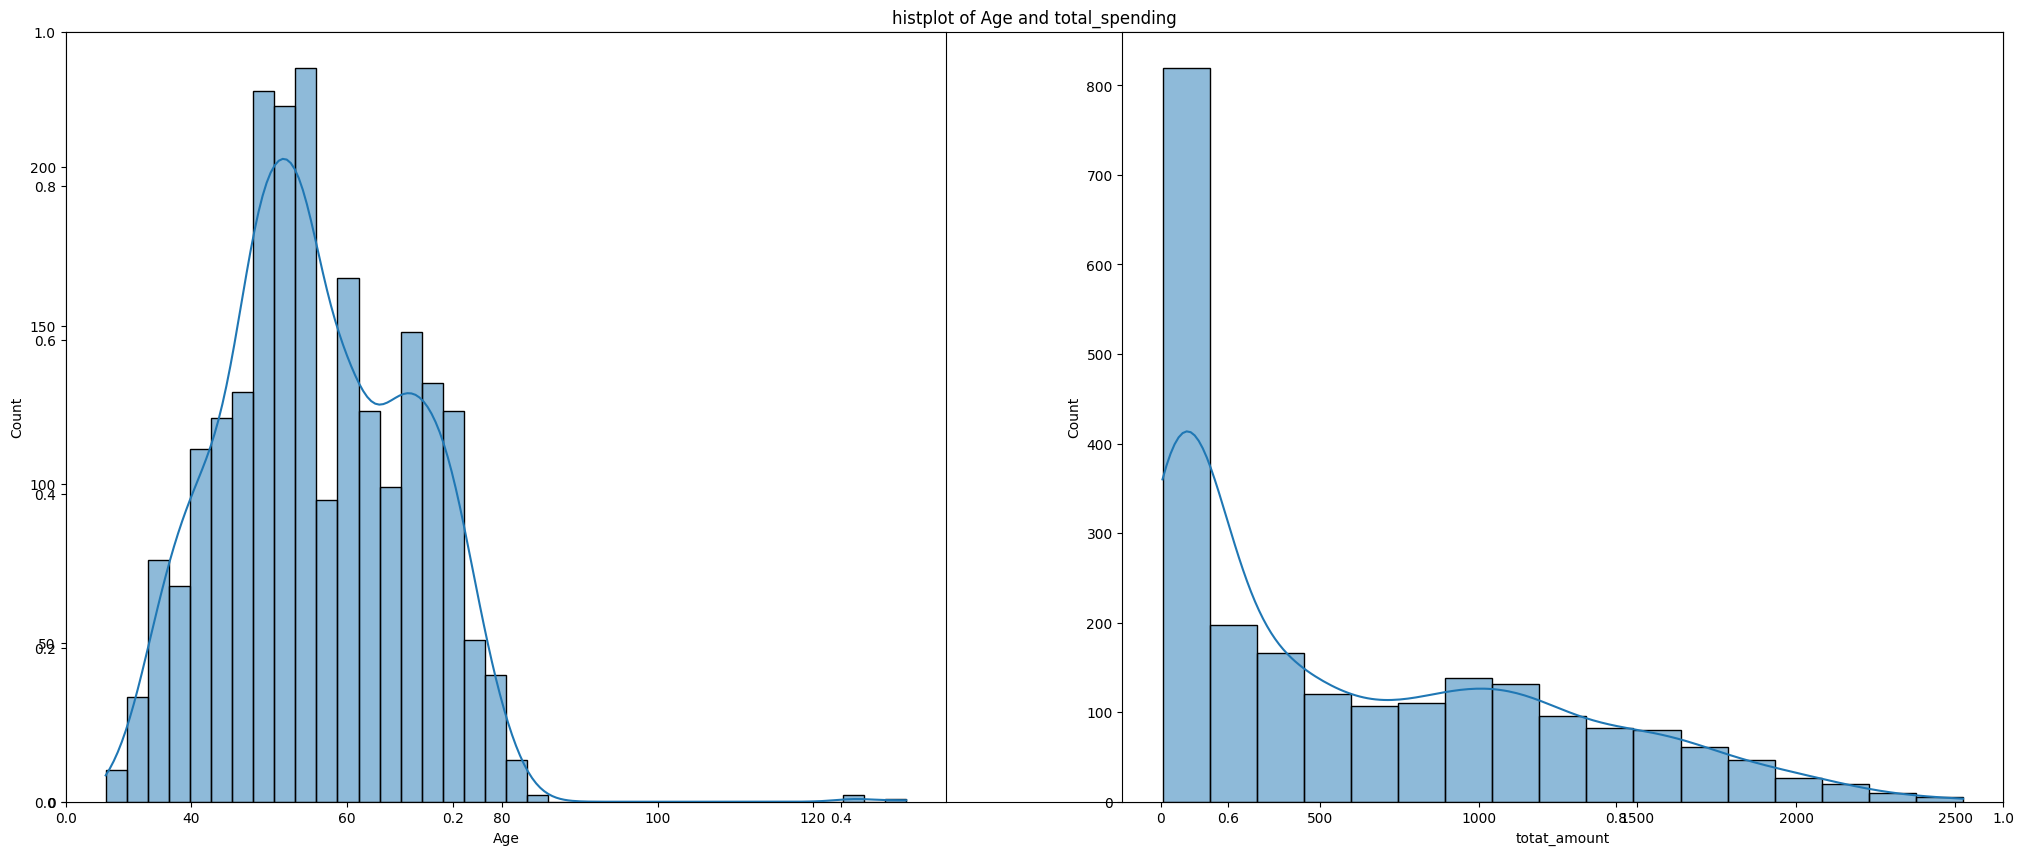

In [36]:
plt.figure(figsize=(25,10))
plt.title('histplot of Age and total_spending')

plt.subplot(121)
sns.histplot(data=df,x='Age',kde=True)

plt.subplot(122)
sns.histplot(data=df,x='totat_amount',kde=True)

<Axes: title={'center': 'Eduction vs income'}, xlabel='Education', ylabel='Income'>

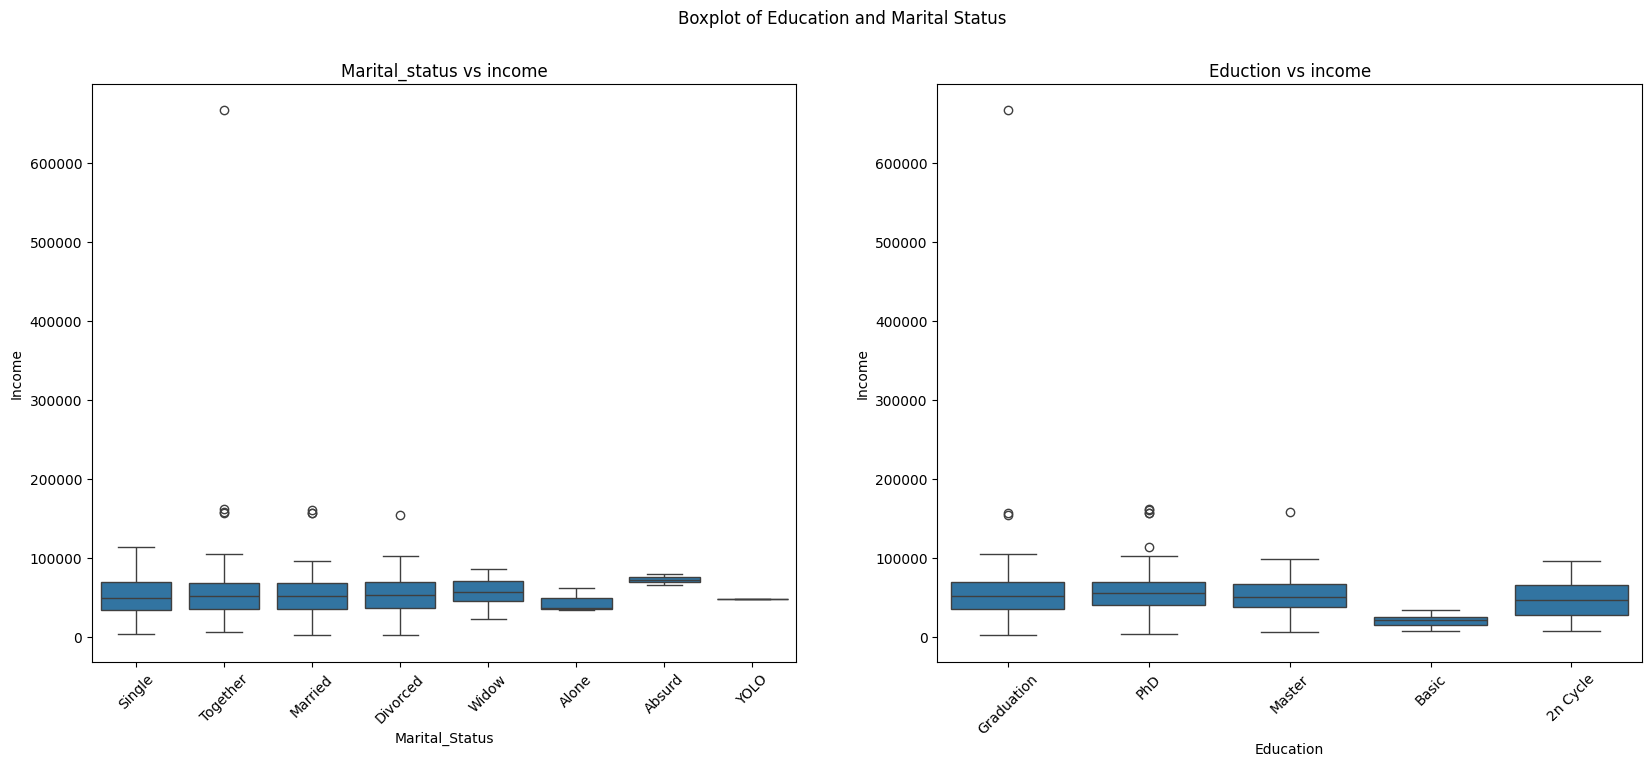

In [46]:
plt.figure(figsize=(20,7.5))
plt.suptitle('Boxplot of Education and Marital Status')

plt.subplot(121)
plt.title('Marital_status vs income')
plt.xticks(rotation=45)
sns.boxplot(data=df,x='Marital_Status',y='Income')

plt.subplot(122)
plt.title('Eduction vs income')
plt.xticks(rotation=45)
sns.boxplot(data=df,x='Education',y='Income')

In [56]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'totat_amount', 'Age_grp'],
      dtype='object')

In [48]:
label = ['18-29','30-39','40-49','50-59','60-69','70+']
bins = [18,30,40,50,60,70,80]

In [49]:
df['Age_grp'] = pd.cut(df['Age'],bins=bins,labels=label)

In [50]:
df['Age_grp']

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: Age_grp, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

# Unsupervised learning

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [66]:
X = df[['Age', 'Income', 'totat_amount', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Recency']]

In [129]:
pca = PCA()

X_scaled = pca.fit_transform(X)

In [130]:
df_new = pd.DataFrame(X_scaled,columns=[f'PC{i+1}' for i in range(X_scaled.shape[1])])

In [131]:
num = Pipeline(steps=[
    ('nums',StandardScaler())
])

In [132]:
X = df_new
y=df['Response']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [133]:
preprocessor = Pipeline(steps=[
    ('numerical',num,X.columns)
])

In [134]:
# Correct pipeline definition
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standard scaling
    ('model', DecisionTreeClassifier())  # Step 2: Decision Tree
])

In [135]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier())])

In [136]:
y_pred = pipe.predict(X_test)

print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('\nclassification_report:\n',classification_report(y_test,y_pred))

accuracy_score:  0.8108108108108109

classification_report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       382
           1       0.33      0.34      0.33        62

    accuracy                           0.81       444
   macro avg       0.61      0.61      0.61       444
weighted avg       0.81      0.81      0.81       444



In [137]:
# Define the parameter grid to search
param_grid = {
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [3, 5, 7],
                         'model__min_samples_split': [2, 5, 10]})

In [138]:
y_pred = grid_search.predict(X_test)

print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('classification_report:\n',classification_report(y_test,y_pred))

accuracy_score:  0.8468468468468469
classification_report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       382
           1       0.35      0.11      0.17        62

    accuracy                           0.85       444
   macro avg       0.61      0.54      0.54       444
weighted avg       0.80      0.85      0.81       444



In [139]:
# Kmean clusteering
from sklearn.cluster import KMeans

In [146]:
wcss = []

for i in range(2,10):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

In [147]:
wcss

[674708888934.2659,
 319503324063.355,
 183350711917.8887,
 122395227416.38979,
 81141944716.77411,
 53615027769.85057,
 40145473090.49783,
 31097694227.11373]

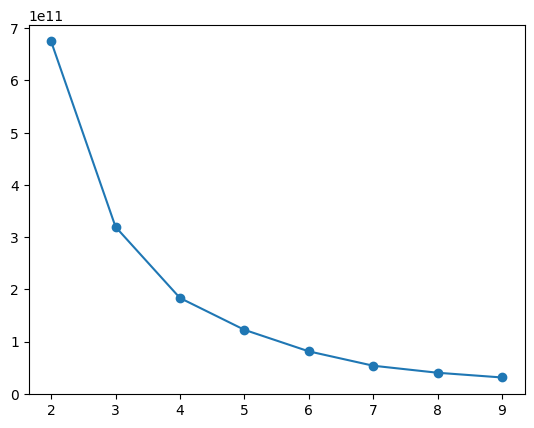

In [148]:
plt.plot(range(2,10),wcss,marker="o")

In [155]:
kmeans = KMeans(n_clusters=4)
df['Clustering'] = kmeans.fit_predict(X_scaled)

In [156]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  NumDealsPurchases  ...  AcceptedCmp1  AcceptedCmp2  \
0  2012-09-04       58                  3  ...             0             0   
1  2014-03-08       38                  2  ...             0             0   
2  2013-08-21       26                  1  ...             0             0   
3  2014-02-10       26                  2  ...             0             0   
4  2014-01-19       94                  5  ...             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  totat_amount  Age_grp  \
0         0              3         11         1   68          1617    60-69   
1         0              3         11         0   71            27      70+   
2         0              3         11         0   60           776    50-59   
3         0              3         11         0   41            53    40-49   
4         0              3         11         0   44           422    40-49   

   Clustering  
0           0  
1           0  
2           3  
3           1  
4           0  

[5 rows x 27 columns]

In [179]:
df['Clustering'].value_counts()

Clustering
0    783
1    747
3    685
2      1
Name: count, dtype: int64

In [182]:
pd.DataFrame(df[df['Clustering'] == 1][['Age','Education','Marital_Status','Income','totat_amount']])

Age   Education Marital_Status   Income  totat_amount
3      41  Graduation       Together  26646.0            53
7      40         PhD        Married  33454.0           169
8      51         PhD       Together  30351.0            46
9      75         PhD       Together   5648.0            49
11     49       Basic        Married   7500.0            61
...   ...         ...            ...      ...           ...
2223   62      Master        Married  33562.0            51
2229   53  Graduation        Married  24434.0            50
2230   41  Graduation         Single  11012.0            84
2232   39  Graduation         Single  26816.0            22
2234   51  Graduation        Married  34421.0            30

[747 rows x 5 columns]

In [183]:
    import joblib
    
    # Save the entire pipeline (preprocessor + model)
    joblib.dump(kmeans,'kmeans_clustering.pkl')
    joblib.dump(grid_search,'pipeline.pkl')

['pipeline.pkl']